**R-2.4**

In [ ]:
class Flower:
    """ A generic flower class  """
    def __init__(self, name_f, number_of_petal, price):
        """Create new flower with 3 attributes

        name_f             name of the flower
        number_of_petal    number of petal
        price              price of the flower
        """

        self.set_attr("name", name_f)
        self.set_attr("number_of_petal", number_of_petal)
        self.set_attr("price", price)

    def set_attr(self, attr, new_attr):
        """Set attributes to given value"""
        if attr == "name":
            if not isinstance(new_attr, str):
                raise TypeError("name_f must be set to a string")
            self._name_f = new_attr
        elif attr == "number_of_petal":
            if not isinstance(new_attr, int):
                raise TypeError("number_of_petal must be set to an int")
            self._number_of_petal = new_attr
        elif attr == "price":
            if not isinstance(new_attr, float):
                raise TypeError("price must be set to a float")
            self._price = new_attr

    def get_attr(self, attr):
        """Get attributes of flower"""
        if attr == "name":
            return self._name_f
        elif attr == "number_of_petal":
            return self._number_of_petal
        elif attr == "price":
            return self._price


flower = Flower("Tulip", 5, 15.3)
print(flower.get_attr("name"), flower.get_attr("number_of_petal"), flower.get_attr("price"))

flower.set_attr("name", "Violet")
flower.set_attr("number_of_petal", 7)
flower.set_attr("price", 5.43)
print(flower.get_attr("name"), flower.get_attr("number_of_petal"), flower.get_attr("price"))


Tulip 5 15.3
Violet 7 5.43


**R-2.5 to R-2.8**

In [ ]:
class CreditCard:
    """A consumer credit card"""
    
    def __init__(self, customer, bank, acnt, limit, balance=0):
        """Create a new credit card instance.
        
        The initial balance is zero.
        
        :param customer: the name of the customer 
        :param bank: the name of the bank
        :param acnt: the account identifier
        :param limit: credit limit
        """
        
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = balance
        
    def get_customer(self):
        """Return name of the customer"""
        return self._customer
    
    def get_bank(self):
        """Return the bank's name."""
        return self._bank
    
    def get_account(self):
        """Return the card identifying number (typically stored as a string."""
        return self._account
    
    def get_limit(self):
        """Return current credit limit."""
        return self._limit
    
    def get_balance(self):
        """Return current balance."""
        return self._balance

    def set_balance(self, value):
        """Set current balance as value."""
        if not isinstance(value, (int,float)):
          raise TypeError("Amount must be set to either an int or float") 
        if value < 0:
          raise ValueError("Amount must be set to positive number")
        self._balance = value         
          
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        
        Return True if charge was processed; False if charge was denied.
        """
        if not isinstance(price, (int,float)):
            raise TypeError("Price must be set to either an int or float")
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
    
    def make_payment(self, amount):

      """Process customer payment that reduces balance."""
      if not isinstance(amount, (int,float)):
        raise TypeError("Amount must be set to either an int or float") 
      if amount < 0:
        raise ValueError("Amount must be set to positive number")
      self._balance -= amount 

c_card = CreditCard('Barry', 'Bank', '985456843215484', 700, 300)
print(c_card.get_balance())
c_card.make_payment(100)
print(c_card.get_balance())
c_card.charge(300)
print(c_card.get_balance())


wallet = []

wallet.append(CreditCard('John Bowman', 'California Savings', '5391 0375 9387 5309', 2500))
wallet.append(CreditCard('John Bowman', 'California Federal', '3485 0399 3395 1954', 3500))
wallet.append(CreditCard('John Bowman', 'California Finance', '5391 0375 9387 5309', 5000))

for val in range(1, 1000):
    if wallet[0].charge(val*1) == False:
        print("{} card has no available limit".format(wallet[0].get_bank()))
        break
    if wallet[1].charge(val*2) == False:
        print("{} card has no available limit".format(wallet[1].get_bank()))
        break
    if wallet[2].charge(val*3) == False:
        print("{} card has no available limit".format(wallet[2].get_bank()))
        break


300
200
500
California Finance card has no available limit
4959
500


**R-2.9 to R-2.15**

In [ ]:
class Vector:
    """Represent a vector in a multidimensional space"""
    
    def __init__(self, d):
        """Create d-dimensional vector."""
        if isinstance(d, int):
            self._coords = [0] * d
        elif isinstance(d, list):
            self._coords = d

    def __len__(self):
        """Return the dimension of the vector."""
        return len(self._coords)
    
    def __getitem__(self, j):
        """Return jth coordinate of vector."""
        return self._coords[j]
    
    def __setitem__(self, j, val):
        """Set jth coordinate of vector to given value."""
        self._coords[j] = val
    
    def __add__(self, other):
        """Return sum of two vectors."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result

    def __radd__(self, other):
        """Return sum of two vectors."""
        return self.__add__(other)


    def __sub__(self, other):
        """Return substraction of two vectors."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result

    def __mul__(self, n):
        """Return multiplied values of vector."""
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] * n
        return result

    def __rmul__(self, n):
        """Return multiplied values of vector."""
        return self * n

    def __neg__(self):
        """Return negated values of vector."""
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] * -1
        return result
    
    def __eq__(self, other):
        """Return True if vector has same coordinates as other."""
        return self._coords == other._coords
    
    def __ne__(self, other):
        """Return True if vector differs from other."""
        return not self == other  # This rely on existing __eq__ definition
    
    def __str__(self):
        """Produce string representation of vector."""
        return '<' + str(self._coords)[1:-1] + '>'
    
    def __repr__(self):
        """For representation."""
        return '<' + str(self._coords)[1:-1] + '>'

class VectorxVector(Vector):
    def __mul__(self, other):
        result = 0
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        for j in range(len(self)):
            result += self[j] * other[j]
        return result




print(3*"*", "R-2.9", 3*"*")
x = Vector(4)
for i in range(4):
    x[i] = (i*2 + 5) // 3
y = Vector(4)
for i in range(4):
    y[i] = (i*5 + 2) // 4
print(x)
print(y)
total = y - x 
print(total)

print(3*"*", "R-2.10", 3*"*")
x_neg = x.__neg__()
print(x_neg)

print(3*"*", "R-2.11", 3*"*")
x = Vector(4)
for i in range(4):
    x[i] = (i*2 + 5) // 3
y = [5, 2, 3, 4]
print(y + x)

print(3*"*", "R-2.12", 3*"*")
x = Vector(4)
for i in range(4):
    x[i] = (i*2 + 5) // 3
print(x)
y = x*3
print(y)

print(3*"*", "R-2.13", 3*"*")
x = Vector(4)
for i in range(4):
    x[i] = (i*2 + 5) // 3
print(x)
y = 5 * x
print(y)


print(3*"*", "R-2.14", 3*"*")
x = VectorxVector(4)
for i in range(4):
    x[i] = (i*2 + 5) // 3
y = VectorxVector(4)
for i in range(4):
    y[i] = (i*5 + 2) // 4
print(x)
print(y)

total = x * y
print(total)

print(3*"*", "R-2.15", 3*"*")
x = Vector([2, 5, 7, 9])
print(x)


*** R-2.9 ***
<1, 2, 3, 3>
<0, 1, 3, 4>
<-1, -1, 0, 1>
*** R-2.10 ***
<-1, -2, -3, -3>
*** R-2.11 ***
<6, 4, 6, 7>
*** R-2.12 ***
<1, 2, 3, 3>
<3, 6, 9, 9>
*** R-2.13 ***
<1, 2, 3, 3>
<5, 10, 15, 15>
*** R-2.14 ***
<1, 2, 3, 3>
<0, 1, 3, 4>
23
*** R-2.15 ***
<2, 5, 7, 9>


**R-2.18**

In [ ]:
class Progression:
    """Iterator producing a generic progression.
    
    Default iterator produces the whole numbers 0, 1, 2, ...
    """
    
    def __init__(self, start=0):
        """Initialize current to the first value of the progression."""
        self._current = start
    
    def _advance(self):
        """Update self._current to a new value.
        
        THis should be overridden by a subclass to customize progression.
        
        By convention, if current is set to None, this designates the end of a progression.
        """
        
        self._current +=1
        
    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration()
        else:
            answer = self._current
            self._advance()
            return answer
        
    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self
    
    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))

class FibonacciProgression(Progression):
  """Iterator producing a fibonacci progression."""

  def __init__(self, first, second):
    super().__init__(first)
    self._second = second

  def _advance(self):
    self._current = self._current + self._second
    self._second = self._current - self._second


FibonacciProgression(2, 2).print_progression(10)


2 4 6 10 16 26 42 68 110 178


**R-2.19**

In [ ]:
class ArithmeticProgression(Progression):
  """Iterator producing an arithmetic progression."""

  def __init__(self, increment=1, start=0):
    """Create a new arithmetic progression.

    increment    the fixed constant to add to each term (default 1)
    start        the first term of the progression (default 0)
    """

    super().__init__(start)
    self._increment = increment

  def _advance(self):
    """Update current value by adding the fixed increment."""
    self._current += self._increment



In [ ]:
gener = ArithmeticProgression(128)
target = 2**10
for j in range(100):
  if next(gener) >= target:
    print("{} many calls are needed to reach target".format(j))
    break


8 many calls are needed to reach target


**R-2.20**

In [ ]:
# There can be possibility of overriding a method or a variable several times which cause complexity of code.
# If we extend so deep inheritance then the modularity of code and indepence of modules can not be assured.


**R-2.21**

In [ ]:
# We need to divide our code to parts in a efficient way. If we have multiple classes that are inherited from a simple base class, then there is a high possibility of writing same methods(duplicity) for every inherited class.
# However we can design better base class which implements common methods for avoiding duplicity.

**R-2.22**

In [ ]:
from abc import ABCMeta, abstractmethod # need these definitions

class Sequence(metaclass=ABCMeta):
  """Our own version of collections.Sequence abstract base class."""

  @abstractmethod
  def len(self):
    """Return the length of the sequence."""

  @abstractmethod
  def getitem(self, j):
    """Return the element at index j of the sequence."""
  def contains(self, val):
    """Return True if val found in the sequence; False otherwise."""
    for j in range(len(self)):
      if self[j] == val: # found match
        return True
    return False

  def index(self, val):
    """Return leftmost index at which val is found (or raise ValueError)."""
    for j in range(len(self)):
      if self[j] == val: # leftmost match
        return j
    raise ValueError("value not in sequence") # never found a match

  def count(self, val):
    """Return the number of elements equal to given value."""
    k = 0
    for j in range(len(self)):
      if self[j] == val: # found a match
        k += 1
    return k

  def __eq__(self, other):
    if len(self) != len(other):
      raise ValueError('dimensions must agree')
    for j in range(len(self)):
      if self[j] != other[j]: 
        return False
    return True


**R-2.23**

In [ ]:
class SequnceAdvance(Sequence):
  def __lt__(self, other):
    if len(self) != len(other):
      raise ValueError('dimensions must agree')
    for j in range(len(self)):
      if self[j] <= other[j]: 
        return False
    return True

**C-2.25**

In [ ]:
class Vector_PolyMult(Vector):
    def __mul__(self, other):
      """Return either multiplied values of vector or dot multiplication."""
      if isinstance(other, int):
        result = Vector(len(self))
        for j in range(len(self)):
          result[j] = self[j] * other
        return result
      else:
        result = 0
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        for j in range(len(self)):
            result += self[j] * other[j]
        return result


print(3*"*", "u * k", 3*"*")
x = Vector_PolyMult(4)
for i in range(4):
    x[i] = (i*2 + 5) // 3
print(x)
y = x*3
print(y)

        
print(3*"*", "u * v", 3*"*")

y = Vector_PolyMult(4)
for i in range(4):
    y[i] = (i*5 + 2) // 4
print(x)
print(y)

total = x * y
print(total)

*** u * k ***
<1, 2, 3, 3>
<3, 6, 9, 9>
*** u * v ***
<1, 2, 3, 3>
<0, 1, 3, 4>
23


**C.2-26**

In [ ]:
class ReversedSequenceIterator:
  """An iterator for any of Python s sequence types."""
  def __init__(self, sequence):
    """Create an iterator for the given sequence."""
    self._seq = sequence  # keep a reference to the underlying data
    self._k = 0          # will increment to 0 on first call to next
  
  def __next__(self):
    """Return the next element, or else raise StopIteration error."""
    self._k += 1 # advance to next index
    if self._k < len(self._seq)+1:
      return(self._seq[-self._k]) # return the data element
    else:
      raise StopIteration( )
  
  def __iter__(self):
    """By convention, an iterator must return itself as an iterator."""
    return self

In [ ]:
s = ReversedSequenceIterator([1, 2, 3, 4, 5])
for i in s:
  print(i)

5
4
3
2
1


**C-2.27**

In [ ]:
class Range:
  """A class that mimic's the built-in range class"""

  def __init__(self, start, stop=None, step=1):
    """Initialize a Range instance.

    Semantics is similar to built-in range class.
    """
    if step == 0:
      raise ValueError('step cannot be 0')

    if stop is None:
      start, stop = 0, start

    self._length = max(0,(stop - start + step - 1) // step)

    self._start = start
    self._step = step
    self._stop = stop

    def __len__(self):
      return self._length
    
    def __getitem__(self, k):
      if k < 0:
        k+=len(self)
      
      if not 0 <= k < self._length:
        raise IndexError('index out of range')
      
      return self.start + k * self._step
    
    def __contains__(self, k):

      if not self._start <= k < self._stop:
        return False
      
      x, y = divmod(k - self._start, self._step)
      if y = 0:
        True
      else:
        False

In [ ]:
class Range:
    """A class that mimic's the built-in range class."""
    
    def __init__(self, start, stop=None, step=1):
        """Initialize a Range Instance
        Semantics is similar to built-in range class
        """
        if step == 0:
            raise ValueError('step cannot be 0')
        
        if stop is None:
            start, stop = 0, start
            
        # calculate the effective length once
        self._length = max(0, (stop - start + step -1) // step)
        
        # nned knowledge of start and step (but not step) to support _-getitem__
        self._start = start
        self._step = step
        self._stop = stop
        
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):
        if k < 0:
            k += len(self)
        
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
        
        return self._start + k * self._step

    def __contains__(self, r):

      if not self._start <= r < self._stop:
        print(10*"*")
        return False
      
      x, y = divmod(r - self._start, self._step)
      if y == 0:
        return True
      else:
        return False

In [ ]:
r = Range(0, 85,7)
print(42 in r, 81 in r)

True False


**C-2.28-2.29-2.30**

In [ ]:
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""
    
    def __init__(self, customer, bank, acnt, limit, apr):
        """Create a new predatory credit card instance.
        
        The initial balance is zero.
        customer    the name of the customer
        bank        the name of the bank
        acnt        the acount identifier
        limit       credit limit
        apr         annual percentage rate
        """

        super().__init__(customer, bank, acnt, limit)
        self._apr = apr
        self._chargectr = 0
        self._monthly_payment = 0
        self._payment = self.get_balance()
        self._MINIMUM_PERCENTAGE = 25
        self._LATE_FEE = 20

        
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.
        
        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        self._chargectr += 1
        success = super().charge(price)
        if not success:
            super().set_balance(super().get_balance() + 5)
        if self._chargectr > 10:
            super().set_balance(super().get_balance() + 1)
        return success
    
    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        self._chargectr = 0
        if (self._monthly_payment / super().get_balance()) *100 < self._MINIMUM_PERCENTAGE:
          super().set_balance(super().get_balance() + self._LATE_FEE)
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1/12)
            super().set_balance(super().get_balance() * monthly_factor)
        self._monthly_payment = 0
    
    def make_payment(self, amount):
      super().make_payment(amount)
      self._monthly_payment += amount 



In [ ]:
CCard = PredatoryCreditCard('John Bowman' , 'California Savings' ,'56 5391 0375 9387 5309' , 2500, 0.15)

print("No monthly payment")
CCard.charge(500)
CCard.process_month()
print(CCard.get_balance())
CCard.process_month()
print(CCard.get_balance())
print(25*"=")
CCard.make_payment(200)
print("200$ monthly payment which is higher than minimum percentage")
print(CCard.get_balance())
CCard.process_month()
print(CCard.get_balance())


No monthly payment
526.0917567983238
552.489176359833
200$ monthly payment which is higher than minimum percentage
352.489176359833
356.61855777603597


**C-2.31**

In [ ]:
class AbsoluteProgression(Progression):
  """Iterator producing a progression on absolute values for consecutive numbers."""

  def __init__(self, first=200, second=2):
    super().__init__(first)
    self._prev = second

  def _advance(self):
    self._prev, self._current = self._current, abs(self._current - self._prev)


AbsoluteProgression(200, 2).print_progression(10)

200 198 2 196 194 2 192 190 2 188


**C-2.32**

In [ ]:
class RootProgression(Progression):
  """Iterator producing a progression on root values"""

  def __init__(self, first=65536):
    super().__init__(first)

  def _advance(self):
    self._current = (self._current) ** (1/2)

RootProgression().print_progression(4)

65536 256.0 16.0 4.0


**P-2.33**

In [ ]:
import sympy
def first_deriv(formula=x**2+2*x+3):
  x = sympy.Symbol('x')
  y = formula
  return y.diff(x)

In [ ]:
print(first_deriv())
print(first_deriv(x**5 + 8**x + x**9+ 4*x**5))

2*x + 2
8**x*log(8) + 9*x**8 + 25*x**4


**P-2.34**

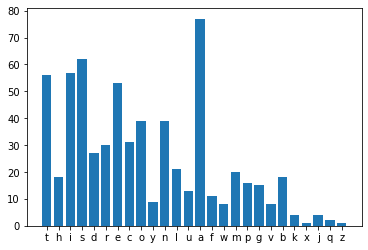

In [ ]:
import re
import matplotlib.pyplot as plt

dcmnt = "text.txt"
f = open(dcmnt, "r")
dcmnt = f.read()
dcmnt = re.sub("[^A-Z]", "", dcmnt,0,re.IGNORECASE)
dcmnt = dcmnt.lower()
freq = {}
for letter in dcmnt:
  if letter in freq:
    freq[letter] += 1
  else:
    freq[letter] = 1
plt.bar(range(len(freq)), list(freq.values()), align='center')
plt.xticks(range(len(freq)), list(freq.keys()))
plt.show()

**P-2.35**

In [ ]:
import random
import string

class Alice:
 def __init__(self):
   self.sent_messages = []
   self.letters = string.ascii_lowercase
 
 def write_message(self):
   message = ''.join(random.choice(self.letters) for i in range(10))
   print("Alice message: ", message)
   self.sent_messages.append(message)
 
 def clear_box(self):
   del self.sent_messages[0]

class Internet:
  def __init__(self):
    self.deliveries = []
  def check_message(self, message):
    if message:
      return True
    else:
      return False
  def deliver(self, message):
    print("1 Message sent")
    self.deliveries.append(message)
  
  def delete_delivered(self):
    del self.deliveries[0]

class Bob:
  def __init__(self):
    self.inbox = []
  def read(self, message):
    self.inbox.append(message)
    print("Bob read: ", self.inbox[0])
  def delete(self):
    del self.inbox[0]
    

In [ ]:
alice = Alice()
internet = Internet()
bob = Bob()

for i in range(5):
  alice.write_message()
  if internet.check_message(alice.sent_messages[0]):
    internet.deliver(alice.sent_messages[0])
    alice.clear_box()
    bob.read(internet.deliveries[0])
    internet.delete_delivered()
    bob.delete()



Alice message:  icufgofynr
1 Message sent
Bob read:  icufgofynr
Alice message:  qgmhyygkft
1 Message sent
Bob read:  qgmhyygkft
Alice message:  sewzoadloj
1 Message sent
Bob read:  sewzoadloj
Alice message:  dtzyxzmulv
1 Message sent
Bob read:  dtzyxzmulv
Alice message:  tqfhxicxcm
1 Message sent
Bob read:  tqfhxicxcm


**P-2.36**

In [ ]:
from random import randint, sample
class Fish:
  def __init__(self, location):
    self.location = location

class Bear:
  def __init__(self, location):
    self.location = location

class River:
  def __init__(self, area):
    self.area = area*[None]

    
river = River(25)

river_dist = sample(range(0, 24), 15)
for i in river_dist:
  if i in river_dist[:7]:
    river.area[i] = Bear(i)
  else:
    river.area[i] = Fish(i)


def time_stamp(n, river):
  for i in range(n):
    print("Time stamp: ", i)
    print(river)
    movement_locs = sample(range(0, 24), 15)
    for loc in movement_locs:
      if type(river[loc]) == type(river[loc+1]):
        if isinstance(river[loc], Bear) and None in river:
          river[river.index(None)] = Bear(river.index(None))
          print("Generate Bear Loc: ", loc)
        elif isinstance(river[loc], Fish) and None in river:
          river[river.index(None)] = Fish(river.index(None))
          print("Generate Fish Loc: ", loc)
        else:
          pass
      elif type(river[loc]) is None:
        pass
      elif type(river[loc]) is Bear:
        river[loc].location = loc+1
        river[loc+1] = river[loc]
        river[loc] = None
      elif type(river[loc]) is Fish:
        if type(river[loc+1]) is Bear:
          river[loc] = None
        elif type(river[loc+1]) is None:
          river[loc].location = loc+1
          river[loc+1] = river[loc]
          river[loc] = None


time_stamp(4, river.area)

Time stamp:  0
[None, None, None, None, None, <__main__.Fish object at 0x7f75c4dd7450>, <__main__.Fish object at 0x7f75c4dd76d0>, <__main__.Fish object at 0x7f75c4dd7fd0>, None, <__main__.Bear object at 0x7f75c4e00750>, <__main__.Bear object at 0x7f75c4dd7b50>, <__main__.Fish object at 0x7f75c4dd74d0>, <__main__.Bear object at 0x7f75c4dd7690>, <__main__.Bear object at 0x7f75c4e00d50>, <__main__.Bear object at 0x7f75c4e00110>, <__main__.Fish object at 0x7f75c4dd79d0>, <__main__.Fish object at 0x7f75c4e8c6d0>, <__main__.Bear object at 0x7f75c4dd7050>, None, <__main__.Bear object at 0x7f75c4e4eb50>, None, <__main__.Fish object at 0x7f75c4dd7090>, None, <__main__.Fish object at 0x7f75c4dd7e10>, None]
Generate Fish Loc:  6
Generate Bear Loc:  12
Generate Fish Loc:  15
Generate Fish Loc:  5
Generate Fish Loc:  0
Time stamp:  1
[<__main__.Fish object at 0x7f75c4dd74d0>, <__main__.Fish object at 0x7f75c4dd9e90>, <__main__.Bear object at 0x7f75c4daed10>, <__main__.Fish object at 0x7f75c4dd9550>

**P-2.37**

In [ ]:
from random import randint, sample, random
class Fish:
  def __init__(self, location):
    self.location = location
    self.gender = True if random() > .5 else False
    self.strength = random()

class Bear:
  def __init__(self, location):
    self.location = location
    self.gender = True if random() > .5 else False
    self.strength = random()

class River:
  def __init__(self, area):
    self.area = area*[None]

    
river = River(25)

river_dist = sample(range(0, 24), 15)
for i in river_dist:
  if i in river_dist[:7]:
    river.area[i] = Bear(i)
  else:
    river.area[i] = Fish(i)


def time_stamp(n, river):
  for i in range(n):
    print("Time stamp: ", i)
    print(river)
    movement_locs = sample(range(0, 24), 15)
    for loc in movement_locs:
      if type(river[loc]) == type(river[loc+1]):
        if isinstance(river[loc], Bear) and None in river:
          if river[loc].gender != river[loc].gender:
            river[river.index(None)] = Bear(river.index(None))
            print("Generate Bear Loc: ", loc)
          elif river[loc].strength > river[loc+1].strength:
            river[loc+1] = None
          elif river[loc].strength < river[loc+1].strength:
            river[loc] = None

        elif isinstance(river[loc], Fish) and None in river:
          if river[loc].gender != river[loc].gender:
            river[river.index(None)] = Fish(river.index(None))
            print("Generate Fish Loc: ", loc)
          elif river[loc].strength > river[loc+1].strength:
            river[loc+1] = None
          elif river[loc].strength < river[loc+1].strength:
            river[loc] = None          
        else:
          pass
      elif type(river[loc]) is None:
        pass
      elif type(river[loc]) is Bear:
        river[loc].location = loc+1
        river[loc+1] = river[loc]
        river[loc] = None
      elif type(river[loc]) is Fish:
        if type(river[loc+1]) is Bear:
          river[loc] = None
        elif type(river[loc+1]) is None:
          river[loc].location = loc+1
          river[loc+1] = river[loc]
          river[loc] = None

time_stamp(25, river.area)

Time stamp:  0
[None, <__main__.Bear object at 0x7f75c4daf190>, <__main__.Bear object at 0x7f75c4daff10>, <__main__.Fish object at 0x7f75c4daf390>, <__main__.Bear object at 0x7f75c4dafad0>, None, None, None, None, None, <__main__.Fish object at 0x7f75c4dafbd0>, None, <__main__.Fish object at 0x7f75c4dafc50>, <__main__.Bear object at 0x7f75c4daf110>, <__main__.Fish object at 0x7f75c4dafcd0>, <__main__.Fish object at 0x7f75c4dafa90>, <__main__.Bear object at 0x7f75c4daf9d0>, <__main__.Fish object at 0x7f75c4daf090>, <__main__.Bear object at 0x7f75c4daf0d0>, <__main__.Fish object at 0x7f75c4dafb50>, None, None, <__main__.Bear object at 0x7f75c4daf910>, <__main__.Fish object at 0x7f75c4dafe10>, None]
Time stamp:  1
[None, <__main__.Bear object at 0x7f75c4daf190>, None, None, None, <__main__.Bear object at 0x7f75c4dafad0>, None, None, None, None, <__main__.Fish object at 0x7f75c4dafbd0>, None, <__main__.Fish object at 0x7f75c4dafc50>, None, None, <__main__.Bear object at 0x7f75c4daf110>, <_

**P-2.38**

In [36]:
import os
import random
class eBook():
  def __init__(self, directory_books, balance):
    self.purchased = []
    self.directory_books = directory_books
    self.books = {}
    self.balance = balance
  
  def store(self, view=False):
    for book in os.listdir(self.directory_books):
      self.books[book.replace(".txt","")] = random.random()*(35-5) + 5
    if view:
      print(self.books)

  def buy(self, book):
    if book in self.purchased:
      print("You have already purchased this book.")
    elif book in self.books:
      if self.balance > self.books[book]:
        self.purchased.append(book)
        self.balance = self.balance - self.books[book]
        print("You purchased ", book)
      else:
        print("Insufficient balance")

  def view_shelf(self):
    print(self.purchased)
  
  def get_balance(self):
    print(self.balance)

  def read(self, book):
    keep_reading = True
    if book in self.purchased:
      book_txt = book + ".txt"
      book_dir = self.directory_books + "/" + book_txt
      print("Please enter page number iteratively")
      print("Please type exit when you want to quit")
      with open(book_dir) as f:
        lines = f.read()
        while keep_reading:
          num = input()
          if num == "exit":
            break
          else:
            print(lines[1000*int(num):1000*int(num)+1000])
          


  


In [37]:
ebook = eBook("/content/drive/MyDrive/Colab Notebooks/Books", 1000)
ebook.store(True)
ebook.buy('The Adventures of Sherlock Holmes')
ebook.view_shelf()
ebook.get_balance()
ebook.read('The Adventures of Sherlock Holmes')

{'The Adventures of Sherlock Holmes': 26.184016807578132, 'A Tale of Two Cities': 29.87258986076461, 'Great Expectations': 25.72637281784532, 'War and Peace': 28.248195269015316, 'Dubliners': 17.08188721784233, 'The Dream': 10.813102587267704}
You purchased  The Adventures of Sherlock Holmes
['The Adventures of Sherlock Holmes']
973.8159831924219
Please enter page number iteratively
Please type exit when you want to quit
2
softer passions, save with a gibe
and a sneer. They were admirable things for the observer—excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doubt upon all his mental results. Grit in a sensitive
instrument, or a crack in one of his own high-power lenses, would not
be more disturbing than a strong emotion in a nature such as his. And
yet there was but one woman to him, and that woman was the

**P-2.39**

In [63]:
class Polygon():
  def __init__(self, sides):
    self.sides = sides

  def area():
    """ Calculation of area for given polygon"""
    pass
  def calc_perimeter(self):
    """Calculation of perimeter for given polygon"""
    self.perimeter = 0
    for side in self.sides:
      self.perimeter += side
    return self.perimeter


class Triangle(Polygon):
  def __init__(self, sides):
    super().__init__(sides)
  
  def area(self):
    half_p = self.calc_perimeter() / 2
    total = 1
    for side in self.sides:
      total *= (half_p - side)
    
    total = (half_p * total) ** (1/2)
    return total

class Quadrilateral(Polygon):
  def __init__(self, sides):
    super().__init__(sides)
  
  def calc_perimeter(self):
    self.perimeter = 0
    for side in self.sides:
      self.perimeter += side
    
    return self.perimeter

  def area(self):
    pass
    return total


In [64]:
triangle = Triangle([6, 8, 13])
print("Triangle perimeter: ", triangle.calc_perimeter())
print("Triangle area: ", triangle.area())

qlaterat = Quadrilateral([5, 4, 2, 4])
print("Quadrilateral perimeter: ", qlaterat.calc_perimeter())

Triangle perimeter:  27
Triangle area:  16.68644659596524
Quadrilateral perimeter:  15
